<p><b><i><pre><span style="color:#ADD8E6;font-size:0.75em;">
Đề bài: Xây dựng Hồi quy Logistic từ cơ bản bằng Phương pháp Hướng giảm Gradient
Mục tiêu: Sử dụng các thư viện numpy và matplotlib để tự xây dựng một mô hình Hồi quy Logistic từ đầu, không sử dụng các hàm có sẵn của scikit-learn hoặc scipy.optimize. Thay vào đó, bạn sẽ tự lập trình thuật toán hướng giảm gradient để tìm các tham số tối ưu cho mô hình.
Yêu cầu:
1 Khởi tạo dữ liệu:
- Cho tập dữ liệu đầu vào X và nhãn Y như đã cho trong mã.
- Thêm một cột giá trị 1 (hệ số tự do/bias) vào dữ liệu X.
2 Định nghĩa hàm:
- Viết hàm sigmoid(z) để tính hàm kích hoạt Sigmoid.
- Viết hàm loss(w) để tính hàm mất mát cross-entropy.
- Viết hàm gradient(w) để tính đạo hàm của hàm mất mát.
3 Áp dụng thuật toán:
- Khởi tạo một vector trọng số w ban đầu với các giá trị bằng 0.
- Thiết lập các siêu tham số (hyperparameters) như tốc độ học (learning_rate), sai số chấp nhận (tolerance) và số lần lặp tối đa (max_iters).
- Sử dụng một vòng lặp while để thực hiện thuật toán hướng giảm gradient: cập nhật trọng số w theo hướng ngược lại của gradient cho đến khi đạt được điều kiện dừng (gradient đủ nhỏ hoặc đạt số lần lặp tối đa).
4 Dự đoán và trực quan hóa:
- Sử dụng vector trọng số w đã tìm được để dự đoán nhãn cho một điểm mới có tọa độ (1, 4).
- Tính toán phương trình của đường phân tách (decision boundary).
- Vẽ một biểu đồ trực quan, hiển thị các điểm dữ liệu ban đầu, điểm dự đoán, và đường phân tách của mô hình.

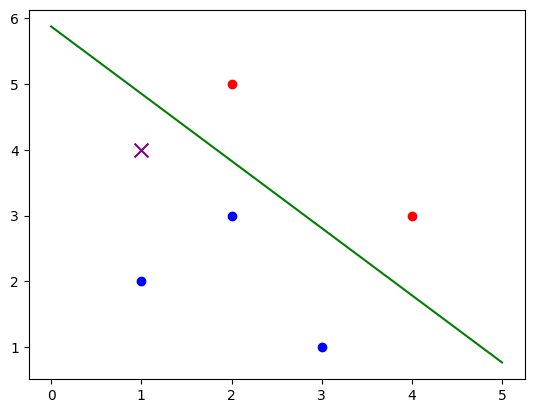

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 2],
              [2, 3],
              [3, 1],
              [2, 5],
              [4, 3]])
Y = np.array([1, 1, 1, 0, 0])

X = np.concatenate((np.ones(shape=(len(X), 1)),
                    X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(w):
    L = 0
    for x, y in zip(X, Y):
        if y == 0:
            L += -np.log(1 - sigmoid(np.dot(w, x)))
        else:
            L += -np.log(sigmoid(np.dot(w, x)))
    return L / len(X)

def gradient(w):
    G = 0
    for x, y in zip(X, Y):
        G += (sigmoid(np.dot(w, x)) - y) * x
    return G / len(X)

# Phương pháp hướng giảm
w0 = np.zeros(X.shape[1])
learning_rate = 0.1
tolerance = 1e-5
max_iters = 1e4

w = w0
num_iters = 0
loss_history = [loss(w)]

while True:
    num_iters += 1
    w -= learning_rate * gradient(w)
    loss_history.append(loss(w))

    if np.linalg.norm(gradient(w)) < tolerance or num_iters == max_iters:
        break

num_iters
w
loss_history

x_pred = np.array([1, 1, 4])
prob_pred = sigmoid(np.dot(w, x_pred))
y_pred = 1 if prob_pred >= 0.5 else 0

a = -w[1] / w[2]
b = -w[0] / w[2]

plt.figure()

plt.scatter(X[Y == 1][:, 1], X[Y == 1][:, 2],
            color='blue', label='Nhãn 1')
plt.scatter(X[Y == 0][:, 1], X[Y == 0][:, 2],
            color='red', label='Nhãn 0')
plt.scatter(x_pred[1], x_pred[2], color='purple',
            marker='x', s=100)

X1 = np.linspace(0, 5, 100)
X2 = a * X1 + b
plt.plot(X1, X2, color='green')
plt.show()